<b>Проект - НКО Благотворительная больница</b>

# Описание проекта

Цель проекта - провести анализ данных о платежах и дать рекомендации по улучшению эффективности рекламы для увеличения привлеченных средств.



1.   Загрузка и подготовка данных <br>
1.1  Загрузка и изучение данных<br>
1.2  Переименование столбцов<br>
1.3  Объединение данных<br>
1.4  Удаление дубликатов<br>
1.5  Удаление лишних или пустых колонок<br>
1.6  Преобразование типов данных<br>
1.7  Обработка пропусков<br>
2.   Анализ данных<br>
2.1  Клиенты<br>
2.2  Конверсия<br>
3.   Выводы и рекомендации<br>
4.   Подготовка презентации<br>



# Загрузка и подготовка данных

## Загрузка и изучение данных

Загружаем библиотеки

In [80]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import warnings
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

### Создаем функцию анализа датасета

In [ ]:
def show_stats(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    '''
    Функция для отображения информации о датасете
    '''
    start_shape = df.shape
    mins, means, medians, maxs = [], [], [], []
    stats_df = pd.DataFrame(index=df.columns.tolist())
    stats_df['dtype'] = [df[col].dtypes for col in df.columns]
    stats_df['nans_count'] = df.isna().sum().tolist()
    stats_df['nans_ratio'] = (stats_df.nans_count / start_shape[0] * 100).round(2)
    stats_df['duplicates_count'] = df.duplicated().sum().tolist()
    stats_df['duplicates_ratio'] = (stats_df.duplicates_count / start_shape[0] * 100).round(2)
    stats_df['uniques'] = [df[col].nunique() for col in df.columns]
    numeric_columns = ['nans_count', 'nans_ratio', 'uniques', 'min', 'mean', 'median', 'max']
    for col in df.columns:
        if df[col].dtypes in ['int', 'float']:
            mins.append(round(df[col].min(), 2))
            means.append(round(df[col].mean(), 2))
            medians.append(round(df[col].median(), 2))
            maxs.append(round(df[col].max(), 2))
        else:
            mins.append(0)
            means.append(0)
            medians.append(0)
            maxs.append(0)
    stats_df['min'], stats_df['mean'], stats_df['median'], stats_df['max'] = mins, means, medians, maxs
    display(stats_df.style
            .highlight_max(color='yellowgreen', subset=numeric_columns)
            .format('{:.2f}', subset=numeric_columns))

Загружаем файлы

In [49]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key1 = 'https://disk.yandex.ru/d/XXX'
final_url = base_url + urlencode(dict(public_key=public_key1))
response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)
df = pd.read_csv(download_url ,sep = ';',skiprows=4, on_bad_lines='skip' )
df.head(5) 

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [50]:
show_stats(df)

,dtype,nans_count,nans_ratio,duplicates_count,duplicates_ratio,uniques,min,mean,median,max
Дата,object,0.00,0.00,25,0.010000,151.00,0.00,0.00,0.00,0.00
Кампания,object,0.00,0.00,25,0.010000,24.00,0.00,0.00,0.00,0.00
№ Кампании,int64,0.00,0.00,25,0.010000,24.00,0.00,0.00,0.00,0.00
Метка,object,0.00,0.00,25,0.010000,1.00,0.00,0.00,0.00,0.00
Условие показа,object,0.00,0.00,25,0.010000,1196.00,0.00,0.00,0.00,0.00
Пол,object,0.00,0.00,25,0.010000,3.00,0.00,0.00,0.00,0.00
Уровень платежеспособности,object,0.00,0.00,25,0.010000,4.00,0.00,0.00,0.00,0.00
Возраст,object,0.00,0.00,25,0.010000,7.00,0.00,0.00,0.00,0.00
Показы,int64,0.00,0.00,25,0.010000,2129.00,0.00,0.00,0.00,0.00
Взвешенные показы,object,0.00,0.00,25,0.010000,2129.00,0.00,0.00,0.00,0.00


In [51]:
public_key2 = 'https://disk.yandex.ru/i/XXX'
final_url = base_url + urlencode(dict(public_key=public_key2))
response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)
clients = pd.read_excel(download_url)
clients.head(5)

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


In [52]:
show_stats(clients)

,dtype,nans_count,nans_ratio,duplicates_count,duplicates_ratio,uniques,min,mean,median,max
id,int64,0.00,0.00,0,0.000000,1166.00,0.00,0.00,0.00,0.00
Первый платеж,datetime64[ns],0.00,0.00,0,0.000000,1166.00,0.00,0.00,0.00,0.00
Подписки вкл,int64,0.00,0.00,0,0.000000,3.00,0.00,0.00,0.00,0.00
Подписки выкл,int64,0.00,0.00,0,0.000000,6.00,0.00,0.00,0.00,0.00
Типы оплаты,object,168.00,14.41,0,0.000000,7.00,0.00,0.00,0.00,0.00
Платежей за год,int64,0.00,0.00,0,0.000000,17.00,0.00,0.00,0.00,0.00
Сумма за год,int64,0.00,0.00,0,0.000000,110.00,0.00,0.00,0.00,0.00
Средний платеж в год,object,0.00,0.00,0,0.000000,117.00,0.00,0.00,0.00,0.00
Всего платежей,int64,0.00,0.00,0,0.000000,23.00,0.00,0.00,0.00,0.00
Сумма всего,int64,0.00,0.00,0,0.000000,120.00,0.00,0.00,0.00,0.00


In [56]:
public_key3 = 'https://disk.yandex.ru/i/XXX'
final_url = base_url + urlencode(dict(public_key=public_key3))
response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)
donors = pd.read_excel(download_url)
donors.head(5)    

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


In [57]:
show_stats(donors)

,dtype,nans_count,nans_ratio,duplicates_count,duplicates_ratio,uniques,min,mean,median,max
ID,int64,0.00,0.00,0,0.000000,813.00,0.00,0.00,0.00,0.00
Тип донора,object,0.00,0.00,0,0.000000,2.00,0.00,0.00,0.00,0.00
Дата первого пожертвования,object,18.00,2.21,0,0.000000,789.00,0.00,0.00,0.00,0.00
Сумма первого пожертвования,float64,18.00,2.21,0,0.000000,55.00,10.00,1001.75,450.00,50000.00
Кампания первого пожертвования,object,18.00,2.21,0,0.000000,2.00,0.00,0.00,0.00,0.00
Метки донора,float64,813.00,100.00,0,0.000000,0.00,nan,nan,nan,nan
Кампании,object,18.00,2.21,0,0.000000,3.00,0.00,0.00,0.00,0.00
Платёжные операторы,object,18.00,2.21,0,0.000000,4.00,0.00,0.00,0.00,0.00
Дата последнего пожертвования,object,18.00,2.21,0,0.000000,788.00,0.00,0.00,0.00,0.00
Сумма последнего пожертвования,float64,18.00,2.21,0,0.000000,54.00,10.00,1062.75,450.00,50000.00


## Приведем названия столбцов к snake_case для ускорения работы с данными

In [58]:
# Создаем список из текущих колонок
columns_start = df.columns.tolist()
# Создаем список с новыми названиями колонок
columns_end = ['date', 'ads_company', 'ads_number', 'label', 'condition', 'sex', 'payable','age','shows','position_shows','clicks','CTR (%)','wCTR (%)','expanses_rub',
                'avg_price_click', 'pay_click', 'avg_position', 'avg_traffic','avg_clicks','refuses', '1000_price','pages in','convestion%', 'goal_price','conversions',
                'rentable', 'fraction_ads','income','profit', 'sum_vs','price_vs','vs_fraction%', '25%show','50%show','75%show', '100%show','25%show%','50%show%','75%show%',
                 '100%show%','avg_pay_dosmotr', 'visible_shows','invisible_shows','undefines_shows','measured_shows%','visible_shows%']
# Создаем словарь, где ключ текущее название колонки, а значение - новое название колонки
change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}
# меняем названия
df = df.rename(columns=change_col_dict)

In [59]:
clients.columns = ['id', 'first_pay' ,'subscribe_on','subscribe_off','pay_type','pay_per_year','sum_per_year','avg_pay_year','total_pay','total','avg','sum_month','countrys','regions', 'last_pay','code']

In [60]:
donors.columns = ['id', 'type','first_pay','sum_pay','ads_conpany_first','labels','ads_company','pay_operator','last_pay','sum_last_pay','ads_last_pay','total','curency','code']

## Объединение данных

Объединим плательщиков из 2х систем и выберем лишь те строки, где были платежи

In [61]:
clients_merge=clients[['code','first_pay','last_pay','total']]
donors_merge=donors[['code','first_pay','last_pay','total']]
donors_merge.head()
all=pd.concat([clients_merge, donors_merge], axis=0)
all_payers=all[all.total>1]
all_payers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 3 to 812
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       1750 non-null   int64 
 1   first_pay  1750 non-null   object
 2   last_pay   1750 non-null   object
 3   total      1750 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


Удалены пустыне и не несущие информации строки. После объединения в данных есть пересечения, их обработаем далее на этапе анализа дубликатов.

## Удаление дубликатов

### Полные дубликаты

In [62]:
print('Было:',df.shape[0], all_payers.shape[0])
first_val=df.shape[0]
all_payers=all_payers.drop_duplicates ()
df=df.drop_duplicates()
new_val=df.shape[0]
print('Стало:', df.shape[0], all_payers.shape[0])
print('% дубликатов:', (first_val-new_val)/first_val*100)

Было: 308023 1750
Стало: 307998 1750
% дубликатов: 0.008116277031260652


### Неявные дубликаты

In [63]:
all2=all_payers.duplicated(subset=['code'], keep=False)
print('Неявные дубликаты в all_payers:',all_payers.shape[0]-all2.shape[0] )

Неявные дубликаты в all_payers: 0


## Удаление лишних или пустых колонок

In [64]:
df.drop(['income', 'profit'], axis= 1 , inplace= True )

In [65]:
df.drop(['label', 'avg_position','avg_traffic', 'avg_clicks' ], axis= 1 , inplace= True )

In [66]:
df.drop(['undefines_shows', 'measured_shows%', 'visible_shows%'], axis= 1 , inplace= True )

In [67]:
df.drop(['avg_pay_dosmotr', 'visible_shows', 'invisible_shows'], axis= 1 , inplace= True )

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307998 entries, 0 to 308022
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             307998 non-null  object
 1   ads_company      307998 non-null  object
 2   ads_number       307998 non-null  int64 
 3   condition        307998 non-null  object
 4   sex              307998 non-null  object
 5   payable          307998 non-null  object
 6   age              307998 non-null  object
 7   shows            307998 non-null  int64 
 8   position_shows   307998 non-null  object
 9   clicks           307998 non-null  int64 
 10  CTR (%)          307998 non-null  object
 11  wCTR (%)         307998 non-null  object
 12  expanses_rub     307998 non-null  object
 13  avg_price_click  307998 non-null  object
 14  pay_click        307998 non-null  object
 15  refuses          307998 non-null  object
 16  1000_price       307998 non-null  object
 17  pages in       

Удалим строки без просмотров

In [69]:
df=df[df.shows>0]
df.shape[0]

307891

## Преобразование типов данных

Приведен даты к datetime виду

In [70]:
all_payers.first_pay=pd.to_datetime(all_payers.first_pay).dt.normalize()
all_payers.last_pay=pd.to_datetime(all_payers.last_pay).dt.normalize()
all_payers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 3 to 812
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   code       1750 non-null   int64         
 1   first_pay  1750 non-null   datetime64[ns]
 2   last_pay   1750 non-null   datetime64[ns]
 3   total      1750 non-null   int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 68.4 KB


In [71]:
df.date=pd.to_datetime(df.date).dt.normalize()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307891 entries, 0 to 308022
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             307891 non-null  datetime64[ns]
 1   ads_company      307891 non-null  object        
 2   ads_number       307891 non-null  int64         
 3   condition        307891 non-null  object        
 4   sex              307891 non-null  object        
 5   payable          307891 non-null  object        
 6   age              307891 non-null  object        
 7   shows            307891 non-null  int64         
 8   position_shows   307891 non-null  object        
 9   clicks           307891 non-null  int64         
 10  CTR (%)          307891 non-null  object        
 11  wCTR (%)         307891 non-null  object        
 12  expanses_rub     307891 non-null  object        
 13  avg_price_click  307891 non-null  object        
 14  pay_click        307891 n

## Обработка пропусков

In [72]:
no =df[df['sex']=='не определен']
print('Пропуски в графе пол', round(no.shape[0]/df.shape[0]*100,2), '%')

Пропуски в графе пол 8.3 %


Количесвто таких значений менее 10%, удалим пропуски по этому полю. Пропуски в этом поле будут мешать определить кто больше платит М или Ж.

In [73]:
df =df[df['sex']!='не определен']
df.shape[0]

282342

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282342 entries, 7 to 308022
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             282342 non-null  datetime64[ns]
 1   ads_company      282342 non-null  object        
 2   ads_number       282342 non-null  int64         
 3   condition        282342 non-null  object        
 4   sex              282342 non-null  object        
 5   payable          282342 non-null  object        
 6   age              282342 non-null  object        
 7   shows            282342 non-null  int64         
 8   position_shows   282342 non-null  object        
 9   clicks           282342 non-null  int64         
 10  CTR (%)          282342 non-null  object        
 11  wCTR (%)         282342 non-null  object        
 12  expanses_rub     282342 non-null  object        
 13  avg_price_click  282342 non-null  object        
 14  pay_click        282342 n

# Анализ данных

## Клиенты

In [75]:
df.groupby('sex')['clicks'].count()

sex
женский    144193
мужской    138149
Name: clicks, dtype: int64

<Axes: ylabel='clicks'>

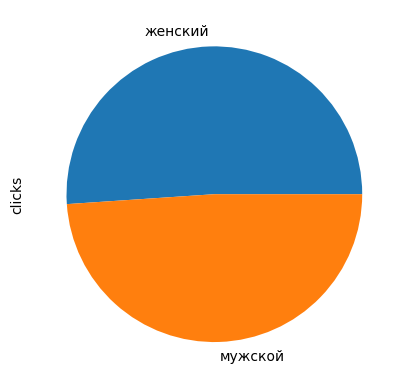

In [76]:
df.groupby('sex')['clicks'].count().plot(kind="pie")

Кликов со стороны женщин больше.

In [77]:
df.groupby('age')['clicks'].count()

age
18-24           42003
25-34           55422
35-44           54391
45-54           47017
младше 18       14660
не определен    19027
старше 55       49822
Name: clicks, dtype: int64

Мах клики от аудитории 33-44

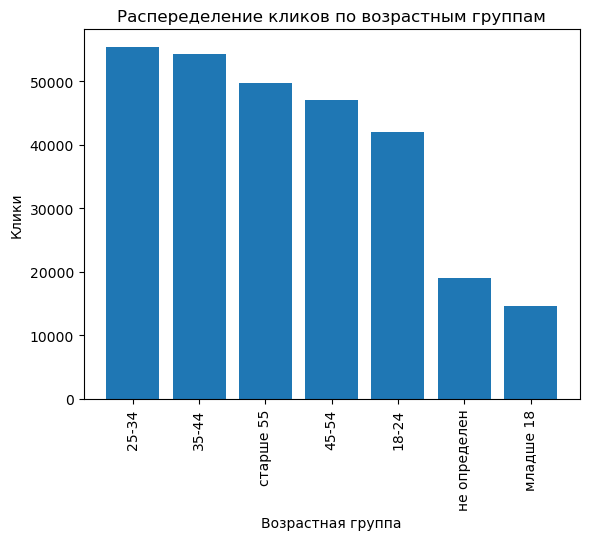

In [84]:
x=df.groupby('age').clicks.count().sort_values(ascending=False).reset_index().age
y=df.groupby('age').clicks.count().sort_values(ascending=False).reset_index().clicks
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Клики')
ax.set_xlabel('Возрастная группа')
ax.set_title('Распеределение кликов по возрастным группам')
ax.set_xticklabels(x, rotation=90)
plt.show()

Лица младше 18 лет не стоит показывать рекламу в связи со слабым интересом.
Целевая аудитория 25-44 года, чуть меньше инетерес к проекту у 45 и старше.

In [ ]:
df.groupby('payable')['clicks'].count()

payable
1%            18181
2-5%          63409
6-10%         68388
Остальные    132364
Name: clicks, dtype: int64

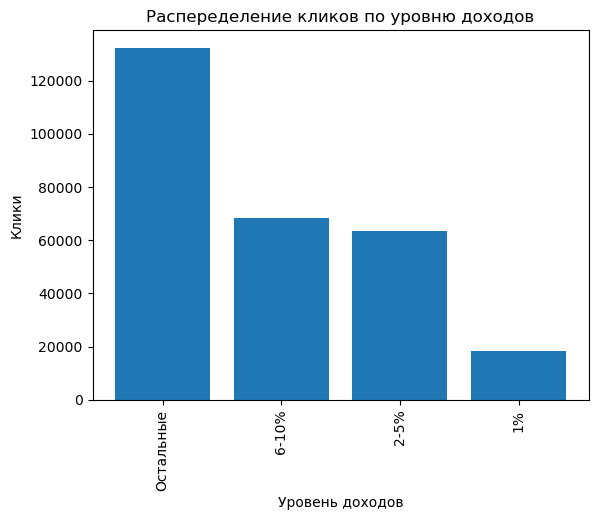

In [86]:
#df.groupby('payable')['clicks'].count().plot(kind="bar")
x=df.groupby('payable').clicks.count().sort_values(ascending=False).reset_index().payable
y=df.groupby('payable').clicks.count().sort_values(ascending=False).reset_index().clicks
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Клики')
ax.set_xlabel('Уровень доходов')
ax.set_title('Распеределение кликов по уровню доходов')
ax.set_xticklabels(x, rotation=90)
plt.show()

Тут видна неполнота данных, слишком большая категория остальные. Лицам из категории дохода 1% показывать рекламу нет смысла.

## Конверсия

Конверсия в Директе — это количество целевых визитов.

Целевое действие — это то, ради чего проводится рекламная кампания.
У нас нет четкого представления что за целевой визи был выбран, поэтому считаем целевым действием оплату, а данные берем из clinets+donnors
Коэффициент конверсии (сonversion rate, CR) — это отношение количества целевых визитов к общему количеству посещений сайта или приложения. CR выражается в процентах.

In [87]:
conversion = all_payers.shape[0]/df.shape[0]*100
print('Конверсия посетителей составила', conversion)

Конверсия посетителей составила 0.619815684524442


Видим, что коэффициент совсем маленький, нужно больше реальных данных об оплате, чтоб посчитать реальный коэффициент.

Посмотрим конверсию по кликам относительно показов

In [88]:
print('Показы' , df['shows'].sum(), 'клики', df['clicks'].sum(), 'конверсия', df['clicks'].sum()/df['shows'].sum()*100, '%' )

Показы 9754192 клики 40852 конверсия 0.41881480290730383 %


Коэффициент еще меньше, возможно стоит поработать над качеством сайта/баннеров

# Выводы и рекомендации

Заказчик предоставил очень мало данных, при чем по данным метрики мы даже не знаем что является целевым визитом.

Анализируя возраст пол и доход видим:
- женщины интересуются проектом суть больше мужчин
- Лица младше 18 лет не стоит показывать рекламу в связи со слабым интересом. Целевая аудитория 25-44 года, чуть меньше инетерес к проекту у 45 и старше.
- Лицам из категории дохода 1% показывать рекламу нет смысла.

# Презентация

https://raw.githubusercontent.com/Alex-tsyg/Yandex-Practicum/main/ProjectNKO/НКО%20Больничка.pdf